# Compute Techiness

### 1) Load Data and Preprocess

In [8]:
import pandas as pd
import pickle

# Load Data (preChatGPT)
with open(file = 'ques_df_pre.pickle', mode = 'rb') as file:
    ques_df = pickle.load(file)
with open(file = 'ans_df_pre.pickle', mode = 'rb') as file:
    ans_df = pickle.load(file)

In [9]:
# 1) Calculate Code Ratio (code_body / full_body)
ques_df['techiness'] = ques_df['code_body'].apply(len) / ques_df['full_body'].apply(len)
# 2) Aggregate average monthly code ratio for each cluster
ques_df['creation_date'] = pd.to_datetime(ques_df['creation_date'])
ques_df['year_month'] = ques_df['creation_date'].dt.to_period('M') # monthly
    # Monthly Aggregation
agg_q_monthly = ques_df.groupby(['year_month', 'community'])['techiness'].mean().reset_index()
agg_q_monthly['year_month'] = agg_q_monthly['year_month'].astype(str)
agg_q_monthly

,year_month,community,techiness
0,2021-09,0,0.540160
1,2021-09,1,0.412834
2,2021-09,2,0.579636
3,2021-09,3,0.497373
4,2021-09,4,0.443724
...,...,...,...
394,2023-08,11,0.507848
395,2023-08,13,0.424254
396,2023-08,14,0.415321
397,2023-08,15,0.297374


In [10]:
# 1) Calculate Code Ratio (code_body / full_body)
ques_df['techiness'] = ques_df['code_body'].apply(len) / ques_df['full_body'].apply(len)
# 2) 
agg_q_monthly = ques_df.groupby('community')['techiness'].mean().reset_index()

In [11]:
agg_q_monthly

,community,techiness
0,0,0.525040
1,1,0.412791
2,2,0.127386
3,3,0.490224
4,4,0.439161
5,5,0.461350
6,6,0.414720
7,7,0.338053
8,8,0.304784
9,9,0.541652


In [12]:
# Copy the data vertically 730 times (copy for each day)
agg_q_monthly = pd.concat([agg_q_monthly] * 730, ignore_index=True) # this should be 13140
agg_q_monthly

,community,techiness
0,0,0.525040
1,1,0.412791
2,2,0.127386
3,3,0.490224
4,4,0.439161
...,...,...
13135,13,0.421145
13136,14,0.403302
13137,15,0.307775
13138,16,0.337905


In [75]:
# Load data
with open(file = '/data1/StackOverflow/_Robustness/TagCluster/ent_Score.pickle', mode = 'rb') as file:
    ent_Score = pickle.load(file)

In [76]:
agg_q_monthly['entropy'] = ent_Score
agg_q_monthly

,community,techiness,entropy
0,0,0.525040,65.454193
1,1,0.412791,75.610966
2,2,0.127386,0.000000
3,3,0.490224,58.728172
4,4,0.439161,106.606754
...,...,...,...
13135,13,0.421145,-111.576775
13136,14,0.403302,-329.915781
13137,15,0.307775,-369.615341
13138,16,0.337905,0.000000


### 2) Load Pre Computed DiD Tables

In [77]:
# Load pre-computed did tables
post = pd.read_csv("/data1/StackOverflow/diff_in_diff/numPosts_did.csv")
entropy = pd.read_csv('/data1/StackOverflow/_Robustness/entropy_did.csv')
lsm = pd.read_csv('/data1/StackOverflow/diff_in_diff/lsm_did2_modified.csv')

post.head()

,year_month_day,count_q,count_a,T_d,P_t,ln_q,ln_a,month
0,2021-09-01,4760,6285,0,0,8.468003,8.745921,9
1,2021-09-02,4859,6423,0,0,8.488588,8.767641,9
2,2021-09-03,4145,5524,0,0,8.329658,8.616858,9
3,2021-09-04,2456,3257,0,0,7.806289,8.088562,9
4,2021-09-05,2446,3380,0,0,7.802209,8.125631,9


In [62]:
len(post)

730

In [74]:
np.log(1.1) * 1.1

0.10484119778475744

In [78]:
# Copy code 19 times (19 clusters)
extend_post = pd.concat([post.loc[post.index.repeat(18)].reset_index(drop=True)])
df_final = pd.concat([extend_post, agg_q_monthly], axis=1)
df_final

,year_month_day,count_q,count_a,T_d,P_t,ln_q,ln_a,month,community,techiness,entropy
0,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,0,0.525040,65.454193
1,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,1,0.412791,75.610966
2,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,2,0.127386,0.000000
3,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,3,0.490224,58.728172
4,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,4,0.439161,106.606754
...,...,...,...,...,...,...,...,...,...,...,...
13135,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,13,0.421145,-111.576775
13136,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,14,0.403302,-329.915781
13137,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,15,0.307775,-369.615341
13138,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,16,0.337905,0.000000


In [68]:
df_final[df_final['entropy'] <=  0]

,year_month_day,count_q,count_a,T_d,P_t,ln_q,ln_a,month,community,techiness,entropy
2,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,2,0.127386,0.000000
8,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,8,0.304784,-163.874636
9,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,9,0.541652,-249.228333
10,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,10,0.373225,-419.741685
11,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,11,0.476285,-166.488123
...,...,...,...,...,...,...,...,...,...,...,...
13134,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,12,0.390341,0.000000
13135,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,13,0.421145,-111.576775
13136,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,14,0.403302,-329.915781
13137,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,15,0.307775,-369.615341


In [49]:
# replace result of all NA values and 극소수의 non-na values로 만들어진 entropy 이상치들 -> 0.
df_final['entropy'] = df_final['entropy'].apply(lambda x: 0 if x <= 0 else x)

In [50]:
df_final[df_final['entropy'] <= 0]

,year_month_day,count_q,count_a,T_d,P_t,ln_q,ln_a,month,community,techiness,entropy
2,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,2,0.127386,0.0
8,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,8,0.304784,0.0
9,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,9,0.541652,0.0
10,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,10,0.373225,0.0
11,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,11,0.476285,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13134,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,12,0.390341,0.0
13135,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,13,0.421145,0.0
13136,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,14,0.403302,0.0
13137,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,15,0.307775,0.0


In [51]:
import numpy as np
df_final['ln_entropy'] = np.log(df_final['entropy'])
df_final[df_final['entropy'] <= 0]

/home/cglee/anaconda3/envs/ahnlab/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,year_month_day,count_q,count_a,T_d,P_t,ln_q,ln_a,month,community,techiness,entropy,ln_entropy
2,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,2,0.127386,0.0,-inf
8,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,8,0.304784,0.0,-inf
9,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,9,0.541652,0.0,-inf
10,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,10,0.373225,0.0,-inf
11,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,11,0.476285,0.0,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...
13134,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,12,0.390341,0.0,-inf
13135,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,13,0.421145,0.0,-inf
13136,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,14,0.403302,0.0,-inf
13137,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,15,0.307775,0.0,-inf


In [52]:
df_final.replace(-np.inf, 0, inplace=True)
df_final[df_final['entropy'] <= 0]

,year_month_day,count_q,count_a,T_d,P_t,ln_q,ln_a,month,community,techiness,entropy,ln_entropy
2,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,2,0.127386,0.0,0.0
8,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,8,0.304784,0.0,0.0
9,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,9,0.541652,0.0,0.0
10,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,10,0.373225,0.0,0.0
11,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,11,0.476285,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13134,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,12,0.390341,0.0,0.0
13135,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,13,0.421145,0.0,0.0
13136,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,14,0.403302,0.0,0.0
13137,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,15,0.307775,0.0,0.0


### DiD Analysis

In [53]:
df_final['year_month_day'] = pd.to_datetime(df_final['year_month_day'])
df_final['year_month'] = df_final['year_month_day'].dt.to_period('M') # monthly
df_final['year_month'] = df_final['year_month'].astype(str)
df_final['year_month_day'] = df_final['year_month_day'].astype(str)

In [54]:
df_final

,year_month_day,count_q,count_a,T_d,P_t,ln_q,ln_a,month,community,techiness,entropy,ln_entropy,year_month
0,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,0,0.525040,65.454193,4.181351,2021-09
1,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,1,0.412791,75.610966,4.325601,2021-09
2,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,2,0.127386,0.000000,0.000000,2021-09
3,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,3,0.490224,58.728172,4.072920,2021-09
4,2021-09-01,4760,6285,0,0,8.468003,8.745921,9,4,0.439161,106.606754,4.669147,2021-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13135,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,13,0.421145,0.000000,0.000000,2023-08
13136,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,14,0.403302,0.000000,0.000000,2023-08
13137,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,15,0.307775,0.000000,0.000000,2023-08
13138,2023-08-31,3674,3135,1,1,8.209036,8.050384,8,16,0.337905,0.000000,0.000000,2023-08


In [65]:
#df_final['month_day'] = df_final['year_month_day'].str.slice(5)

In [60]:
df_final.describe()

,count_q,count_a,T_d,P_t,ln_q,ln_a,month,community,techiness,entropy,ln_entropy
count,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000
mean,3719.464384,4280.730137,0.500000,0.753425,8.176897,8.306961,6.526027,8.500000,0.402696,27.819636,1.614911
std,1025.966486,1309.228510,0.500019,0.431034,0.311201,0.347253,3.447983,5.188325,0.095167,40.247490,2.045390
min,1562.000000,1575.000000,0.000000,0.000000,7.353722,7.362011,1.000000,0.000000,0.127386,0.000000,-5.528965
25%,2758.000000,3145.000000,0.000000,1.000000,7.922261,8.053569,4.000000,4.000000,0.338053,0.000000,0.000000
50%,4011.000000,4504.500000,0.500000,1.000000,8.296796,8.412832,7.000000,8.500000,0.413755,0.000000,0.000000
75%,4563.000000,5492.000000,1.000000,1.000000,8.425736,8.611048,10.000000,13.000000,0.476285,59.608536,4.087799
max,5761.000000,6440.000000,1.000000,1.000000,8.658866,8.770284,12.000000,17.000000,0.541652,165.691735,5.110129


In [58]:
df_final.to_csv('df_final_pre.csv', index=False)

In [36]:
#df_final['ln_techiness'] = np.log(df_final['techiness'])

In [56]:
df_final['ln_entropy'].describe()

count    13140.000000
mean         1.614911
std          2.045390
min         -5.528965
25%          0.000000
50%          0.000000
75%          4.087799
max          5.110129
Name: ln_entropy, dtype: float64

In [57]:
import statsmodels.formula.api as sm
sm.ols('ln_entropy ~ T_d + P_t + techiness + (T_d*P_t) + (T_d*techiness) + (P_t * techiness) + (T_d * P_t * techiness) + C(year_month) + C(community)', df_final).fit(cov_type = 'HC3').summary()

/home/cglee/anaconda3/envs/ahnlab/lib/python3.10/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 47, but rank is 1
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ln_entropy   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 3.547e+12
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        05:45:43   Log-Likelihood:                -16039.
No. Observations:               13140   AIC:                         3.217e+04
Df Residuals:                   13094   BIC:                         3.251e+04
Df Model:                          45                                         
Covariance Type:                  HC3                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 7.636e+09   4054.233   1.88e+06      0.000    7.64e+09    7.64e+09
C(year_month)[T.2021-10]    -0.0519   1.09e-08  -4.77e+06      0.000      -0.052      -0.052
C(year_month)[T.2021-11]    -0.0129    1.1e-08  -1.18e+06      0.000      -0.013      -0.013
C(year_month)[T.2021-12]    -0.3680   3.82e-08  -9.64e+06      0.000      -0.368      -0.368
C(year_month)[T.2022-01]    -0.3180    3.8e-08  -8.36e+06      0.000      -0.318      -0.318
C(year_month)[T.2022-02]    -0.2442   3.81e-08  -6.42e+06      0.000      -0.244      -0.244
C(year_month)[T.2022-03]    -0.2683   3.81e-08  -7.05e+06      0.000      -0.268      -0.268
C(year_month)[T.2022-04]    -0.3579   3.83e-08  -9.35e+06      0.000      -0.358      -0.358
C(year_month)[T.2022-05]    -0.3774   3.83e-08  -9.85e+06      0.000      -0.377      -0.377
C(year_month)[T.2022-06]    -0.3245   3.81e-08  -8.51e+06      0.000      -0.325      -0.325
C(year_month)[T.2022-07]    -0.4040   3.82e-08  -1.06e+07      0.000      -0.404      -0.404
C(year_month)[T.2022-08]    -0.3281   3.82e-08  -8.59e+06      0.000      -0.328      -0.328
C(year_month)[T.2022-09]  -2.79e+11   1.48e+05  -1.88e+06      0.000   -2.79e+11   -2.79e+11
C(year_month)[T.2022-10]  -2.79e+11   1.48e+05  -1.88e+06      0.000   -2.79e+11   -2.79e+11
C(year_month)[T.2022-11]  -2.79e+11   1.48e+05  -1.88e+06      0.000   -2.79e+11   -2.79e+11
C(year_month)[T.2022-12]  -2.79e+11   1.48e+05  -1.88e+06      0.000   -2.79e+11   -2.79e+11
C(year_month)[T.2023-01]  -2.79e+11   1.48e+05  -1.88e+06      0.000   -2.79e+11   -2.79e+11
C(year_month)[T.2023-02]  -2.79e+11   1.48e+05  -1.88e+06      0.000   -2.79e+11   -2.79e+11
C(year_month)[T.2023-03]  -2.79e+11   1.48e+05  -1.88e+06      0.000   -2.79e+11   -2.79e+11
C(year_month)[T.2023-04]  -2.79e+11   1.48e+05  -1.88e+06      0.000   -2.79e+11   -2.79e+11
C(year_month)[T.2023-05]  -2.79e+11   1.48e+05  -1.88e+06      0.000   -2.79e+11   -2.79e+11
C(year_month)[T.2023-06]  -2.79e+11   1.48e+05  -1.88e+06      0.000   -2.79e+11   -2.79e+11
C(year_month)[T.2023-07]  -2.79e+11   1.48e+05  -1.88e+06      0.000   -2.79e+11   -2.79e+11
C(year_month)[T.2023-08]  -2.79e+11   1.48e+05  -1.88e+06      0.000   -2.79e+11   -2.79e+11
C(community)[T.1]        -1.632e+09    866.762  -1.88e+06      0.000   -1.63e+09   -1.63e+09
C(community)[T.2]        -5.783e+09   3070.586  -1.88e+06      0.000   -5.78e+09   -5.78e+09
C(community)[T.3]        -5.063e+08    268.842  -1.88e+06      0.000   -5.06e+08   -5.06e+08
C(community)[T.4]        -1.249e+09    663.136  -1.88e+06      0.000   -1.25e+09   -1.25e+09
C(community)[T.5]        -9.263e+08    491.801  -1.88e+06      0.000   -9.26e+08   -9.26e+08
C(community)[T.6]        -1.604e+09    851.862  -1.88e+06      0.000    -1.6e+09    -1.6e+09
C(community)[T

In [21]:
import statsmodels.formula.api as sm
sm.ols('ln_entropy ~ T_d + techiness + T_d_techiness + C(year_month) + C(community)', df_final).fit(cov_type = 'HC3').summary()

/home/cglee/anaconda3/envs/ahnlab/lib/python3.10/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 44, but rank is 1
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ln_entropy   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.381e+14
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        04:08:18   Log-Likelihood:                 18154.
No. Observations:               13870   AIC:                        -3.622e+04
Df Residuals:                   13827   BIC:                        -3.590e+04
Df Model:                          42                                         
Covariance Type:                  HC3                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.616e+09    137.511   1.18e+07      0.000    1.62e+09    1.62e+09
C(year_month)[T.2021-10]    -0.0086   4.03e-10  -2.15e+07      0.000      -0.009      -0.009
C(year_month)[T.2021-11]     0.0007   4.09e-10    1.7e+06      0.000       0.001       0.001
C(year_month)[T.2021-12]    -0.0101   3.83e-10  -2.64e+07      0.000      -0.010      -0.010
C(year_month)[T.2022-01]     0.0044   3.97e-10   1.11e+07      0.000       0.004       0.004
C(year_month)[T.2022-02]     0.0143   4.12e-10   3.46e+07      0.000       0.014       0.014
C(year_month)[T.2022-03]     0.0142   4.14e-10   3.44e+07      0.000       0.014       0.014
C(year_month)[T.2022-04]    -0.0089   4.04e-10   -2.2e+07      0.000      -0.009      -0.009
C(year_month)[T.2022-05]    -0.0060   4.18e-10  -1.43e+07      0.000      -0.006      -0.006
C(year_month)[T.2022-06]     0.0020   4.29e-10   4.57e+06      0.000       0.002       0.002
C(year_month)[T.2022-07]    -0.0093   4.13e-10  -2.26e+07      0.000      -0.009      -0.009
C(year_month)[T.2022-08]     0.0008   4.15e-10   1.92e+06      0.000       0.001       0.001
C(year_month)[T.2022-09] -2.942e+10   2503.080  -1.18e+07      0.000   -2.94e+10   -2.94e+10
C(year_month)[T.2022-10] -2.942e+10   2503.080  -1.18e+07      0.000   -2.94e+10   -2.94e+10
C(year_month)[T.2022-11] -2.942e+10   2503.080  -1.18e+07      0.000   -2.94e+10   -2.94e+10
C(year_month)[T.2022-12] -2.942e+10   2503.080  -1.18e+07      0.000   -2.94e+10   -2.94e+10
C(year_month)[T.2023-01] -2.942e+10   2503.080  -1.18e+07      0.000   -2.94e+10   -2.94e+10
C(year_month)[T.2023-02] -2.942e+10   2503.080  -1.18e+07      0.000   -2.94e+10   -2.94e+10
C(year_month)[T.2023-03] -2.942e+10   2503.080  -1.18e+07      0.000   -2.94e+10   -2.94e+10
C(year_month)[T.2023-04] -2.942e+10   2503.080  -1.18e+07      0.000   -2.94e+10   -2.94e+10
C(year_month)[T.2023-05] -2.942e+10   2503.080  -1.18e+07      0.000   -2.94e+10   -2.94e+10
C(year_month)[T.2023-06] -2.942e+10   2503.080  -1.18e+07      0.000   -2.94e+10   -2.94e+10
C(year_month)[T.2023-07] -2.942e+10   2503.080  -1.18e+07      0.000   -2.94e+10   -2.94e+10
C(year_month)[T.2023-08] -2.942e+10   2503.080  -1.18e+07      0.000   -2.94e+10   -2.94e+10
C(community)[T.1]        -1.265e+08     10.759  -1.18e+07      0.000   -1.26e+08   -1.26e+08
C(community)[T.2]        -1.078e+08      9.176  -1.18e+07      0.000   -1.08e+08   -1.08e+08
C(community)[T.3]        -2.641e+08     22.468  -1.18e+07      0.000   -2.64e+08   -2.64e+08
C(community)[T.4]        -6.847e+08     58.259  -1.18e+07      0.000   -6.85e+08   -6.85e+08
C(community)[T.5]        -3.261e+08     27.746  -1.18e+07      0.000   -3.26e+08   -3.26e+08
C(community)[T.6]         -5.66e+08     48.160  -1.18e+07      0.000   -5.66e+08   -5.66e+08
C(community)[T

In [40]:
sm.ols('ln_entropy ~ T_d + P_t + techiness + (T_d*P_t) + (T_d*techiness) + (P_t*techiness) + (T_d * P_t * techiness) + C(year_month)', df_final).fit(cov_type = 'HC3').summary()

/home/cglee/anaconda3/envs/ahnlab/lib/python3.10/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 30, but rank is 1
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ln_entropy   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                   0.08348
Date:                Mon, 24 Jun 2024   Prob (F-statistic):              0.773
Time:                        04:53:38   Log-Likelihood:                 18163.
No. Observations:               13870   AIC:                        -3.627e+04
Df Residuals:                   13840   BIC:                        -3.604e+04
Df Model:                          29                                         
Covariance Type:                  HC3                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    5.6661      0.006    930.110      0.000       5.654       5.678
C(year_month)[T.2021-10]    -0.0090      0.004     -2.393      0.017      -0.016      -0.002
C(year_month)[T.2021-11]    -0.0009      0.004     -0.238      0.812      -0.008       0.006
C(year_month)[T.2021-12]    -0.0611      0.004    -13.643      0.000      -0.070      -0.052
C(year_month)[T.2022-01]    -0.0465      0.005    -10.263      0.000      -0.055      -0.038
C(year_month)[T.2022-02]    -0.0368      0.005     -8.128      0.000      -0.046      -0.028
C(year_month)[T.2022-03]    -0.0369      0.005     -8.048      0.000      -0.046      -0.028
C(year_month)[T.2022-04]    -0.0597      0.005    -12.934      0.000      -0.069      -0.051
C(year_month)[T.2022-05]    -0.0572      0.005    -12.343      0.000      -0.066      -0.048
C(year_month)[T.2022-06]    -0.0496      0.005    -10.632      0.000      -0.059      -0.040
C(year_month)[T.2022-07]    -0.0603      0.005    -13.024      0.000      -0.069      -0.051
C(year_month)[T.2022-08]    -0.0504      0.005    -10.916      0.000      -0.059      -0.041
C(year_month)[T.2022-09] -1.173e+10   4.06e+10     -0.289      0.773   -9.13e+10    6.79e+10
C(year_month)[T.2022-10] -1.173e+10   4.06e+10     -0.289      0.773   -9.13e+10    6.79e+10
C(year_month)[T.2022-11] -1.173e+10   4.06e+10     -0.289      0.773   -9.13e+10    6.79e+10
C(year_month)[T.2022-12] -1.173e+10   4.06e+10     -0.289      0.773   -9.13e+10    6.79e+10
C(year_month)[T.2023-01] -1.173e+10   4.06e+10     -0.289      0.773   -9.13e+10    6.79e+10
C(year_month)[T.2023-02] -1.173e+10   4.06e+10     -0.289      0.773   -9.13e+10    6.79e+10
C(year_month)[T.2023-03] -1.173e+10   4.06e+10     -0.289      0.773   -9.13e+10    6.79e+10
C(year_month)[T.2023-04] -1.173e+10   4.06e+10     -0.289      0.773   -9.13e+10    6.79e+10
C(year_month)[T.2023-05] -1.173e+10   4.06e+10     -0.289      0.773   -9.13e+10    6.79e+10
C(year_month)[T.2023-06] -1.173e+10   4.06e+10     -0.289      0.773   -9.13e+10    6.79e+10
C(year_month)[T.2023-07] -1.173e+10   4.06e+10     -0.289      0.773   -9.13e+10    6.79e+10
C(year_month)[T.2023-08] -1.173e+10   4.06e+10     -0.289      0.773   -9.13e+10    6.79e+10
T_d                       1.173e+10   4.06e+10      0.289      0.773   -6.79e+10    9.13e+10
P_t                          0.0509      0.007      7.358      0.000       0.037       0.064
techiness                   -0.0001      0.014     -0.007      0.994      -0.028       0.028
T_d:P_t                     -0.0101      0.007     -1.457      0.145      -0.024       0.003
T_d:techiness             8.968e-05      0.014      0.006      0.995      -0.028       0.028
P_t:techiness                0.0001      0.017      0.006      0.995      -0.032       0.033
T_d:P_t:techin

In [49]:
sm.ols('ln_entropy ~ T_d + P_t + techiness + T_d_P_t + T_d_techiness + P_t_techiness + T_d_P_t_techiness + C(year_month) + C(community)', df_final).fit(cov_type = 'HC3').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ln_entropy   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     680.7
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        05:21:09   Log-Likelihood:                 18169.
No. Observations:               13870   AIC:                        -3.625e+04
Df Residuals:                   13824   BIC:                        -3.590e+04
Df Model:                          45                                         
Covariance Type:                  HC3                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    5.6640      0.004   1467.255      0.000       5.656       5.672
C(year_month)[T.2021-10]    -0.0089      0.004     -2.371      0.018      -0.016      -0.002
C(year_month)[T.2021-11]     0.0006      0.004      0.178      0.859      -0.006       0.008
C(year_month)[T.2021-12]    -0.0182      0.007     -2.703      0.007      -0.031      -0.005
C(year_month)[T.2022-01]    -0.0034      0.007     -0.510      0.610      -0.017       0.010
C(year_month)[T.2022-02]     0.0062      0.007      0.913      0.361      -0.007       0.019
C(year_month)[T.2022-03]     0.0060      0.007      0.889      0.374      -0.007       0.019
C(year_month)[T.2022-04]    -0.0168      0.007     -2.463      0.014      -0.030      -0.003
C(year_month)[T.2022-05]    -0.0144      0.007     -2.123      0.034      -0.028      -0.001
C(year_month)[T.2022-06]    -0.0066      0.007     -0.971      0.331      -0.020       0.007
C(year_month)[T.2022-07]    -0.0174      0.007     -2.550      0.011      -0.031      -0.004
C(year_month)[T.2022-08]    -0.0077      0.007     -1.136      0.256      -0.021       0.006
C(year_month)[T.2022-09]     0.0447      0.008      5.350      0.000       0.028       0.061
C(year_month)[T.2022-10]     0.0434      0.008      5.174      0.000       0.027       0.060
C(year_month)[T.2022-11]     0.0820      0.008      9.860      0.000       0.066       0.098
C(year_month)[T.2022-12]     0.0260      0.009      2.989      0.003       0.009       0.043
C(year_month)[T.2023-01]     0.0496      0.009      5.674      0.000       0.032       0.067
C(year_month)[T.2023-02]     0.0716      0.009      8.201      0.000       0.054       0.089
C(year_month)[T.2023-03]     0.0728      0.009      8.397      0.000       0.056       0.090
C(year_month)[T.2023-04]     0.0535      0.009      6.040      0.000       0.036       0.071
C(year_month)[T.2023-05]     0.0569      0.009      6.481      0.000       0.040       0.074
C(year_month)[T.2023-06]     0.0678      0.009      7.706      0.000       0.051       0.085
C(year_month)[T.2023-07]     0.0564      0.009      6.329      0.000       0.039       0.074
C(year_month)[T.2023-08]     0.0794      0.009      9.088      0.000       0.062       0.097
C(community)[T.1]            0.0006      0.003      0.184      0.854      -0.006       0.007
C(community)[T.2]            0.0005      0.003      0.157      0.875      -0.006       0.007
C(community)[T.3]            0.0013      0.004      0.372      0.710      -0.006       0.008
C(community)[T.4]            0.0034      0.004      0.799      0.424      -0.005       0.012
C(community)[T.5]            0.0016      0.004      0.450      0.653      -0.006       0.009
C(community)[T.6]            0.0029      0.004      0.703      0.482      -0.005       0.011
C(community)[T

In [38]:
# Correlation Check
df_final['T_d_P_t'] = df_final['T_d']*df_final['P_t']
df_final['T_d_techiness'] = df_final['T_d']*df_final['techiness']
df_final['P_t_techiness'] = df_final['P_t']*df_final['techiness']
df_final['T_d_P_t_techiness'] = df_final['T_d']*df_final['P_t']*df_final['techiness']
df_final

,year_month_day,T_d,P_t,ln_q,ln_a,month,ln_entropy,community,techiness,year_month,ln_techiness,T_d_P_t,T_d_techiness,P_t_techiness,T_d_P_t_techiness
0,2021-09-01,0,0,8.468003,8.745921,9,5.701463,0,0.522867,2021-09,-0.648429,0,0.000000,0.000000,0.000000
1,2021-09-01,0,0,8.468003,8.745921,9,5.701463,1,0.481956,2021-09,-0.729903,0,0.000000,0.000000,0.000000
2,2021-09-01,0,0,8.468003,8.745921,9,5.701463,2,0.487975,2021-09,-0.717490,0,0.000000,0.000000,0.000000
3,2021-09-01,0,0,8.468003,8.745921,9,5.701463,3,0.437435,2021-09,-0.826826,0,0.000000,0.000000,0.000000
4,2021-09-01,0,0,8.468003,8.745921,9,5.701463,4,0.301345,2021-09,-1.199499,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13865,2023-08-31,1,1,8.209036,8.050384,8,5.829741,14,0.463609,2023-08,-0.768714,1,0.463609,0.463609,0.463609
13866,2023-08-31,1,1,8.209036,8.050384,8,5.829741,15,0.390341,2023-08,-0.940735,1,0.390341,0.390341,0.390341
13867,2023-08-31,1,1,8.209036,8.050384,8,5.829741,16,0.351258,2023-08,-1.046234,1,0.351258,0.351258,0.351258
13868,2023-08-31,1,1,8.209036,8.050384,8,5.829741,17,0.425306,2023-08,-0.854947,1,0.425306,0.425306,0.425306


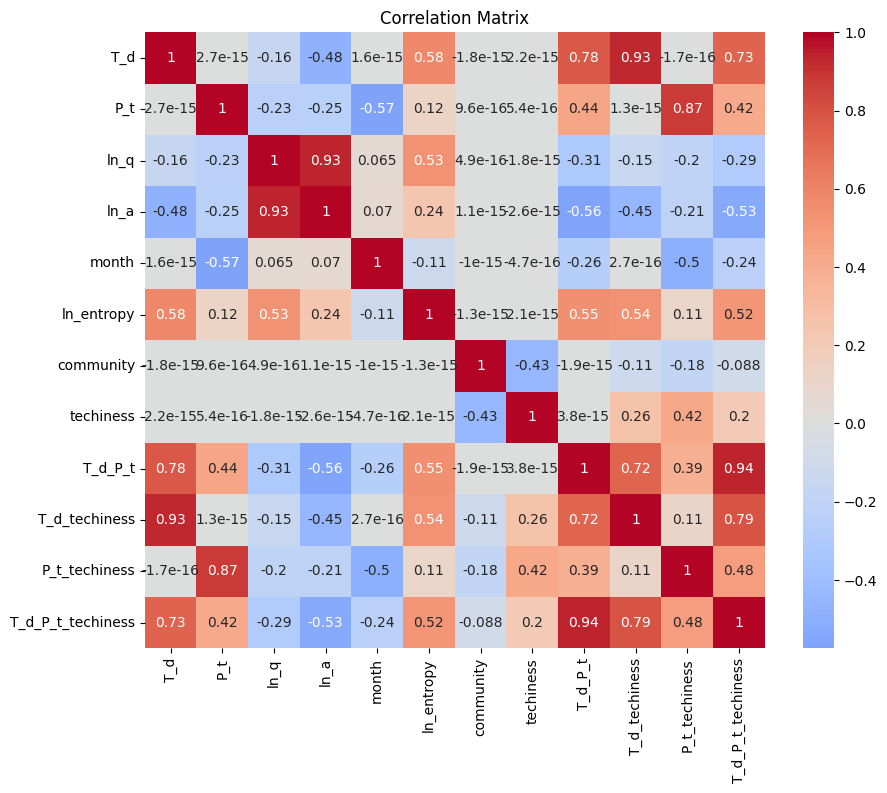

In [16]:
correlation_matrix = df_final.drop(['year_month_day', 'year_month'], axis = 1).corr()
#correlation_matrix = df_final.iloc[:,1:].corr()
# Visualize the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()